In [450]:
#Author: Chao Zhou
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [451]:
# read in dataframe from csv file
df = pd.read_csv("Border_Crossing_Entry_Data.csv") 

## Data preprocessing step

In [452]:
# look at the head of the data
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Roosville,Montana,3318,US-Canada Border,12/01/2018 12:00:00 AM,Buses,1
1,Roosville,Montana,3318,US-Canada Border,12/01/2018 12:00:00 AM,Pedestrians,8
2,Ferry,Washington,3013,US-Canada Border,12/01/2018 12:00:00 AM,Pedestrians,2
3,Massena,New York,704,US-Canada Border,12/01/2018 12:00:00 AM,Trucks,1741
4,Van Buren,Maine,108,US-Canada Border,12/01/2018 12:00:00 AM,Rail Containers Empty,259


In [453]:
# look at the data type of each column and check null value 
df.info()
print(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 7 columns):
Port Name    9534 non-null object
State        9534 non-null object
Port Code    9534 non-null int64
Border       9534 non-null object
Date         9534 non-null object
Measure      9534 non-null object
Value        9534 non-null int64
dtypes: int64(2), object(5)
memory usage: 521.5+ KB
Port Name    False
State        False
Port Code    False
Border       False
Date         False
Measure      False
Value        False
dtype: bool


In [454]:
# change column data type into proper data type
convert_dict = {"Port Name":"object","State":"object","Port Code":"object",
                "Border":"object", "Date":"datetime64", "Measure":"object"}
new_df = df.astype(convert_dict)

In [455]:
# check if everything has been changed to correct type
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 7 columns):
Port Name    9534 non-null object
State        9534 non-null object
Port Code    9534 non-null object
Border       9534 non-null object
Date         9534 non-null datetime64[ns]
Measure      9534 non-null object
Value        9534 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 521.5+ KB


In [456]:
# look at each column's value to see if need further data processing
# look at how many port names and port code to see if they are corresponding to each other
port_names = new_df["Port Name"].unique()
port_codes = new_df["Port Code"].unique()
print("There are", len(port_names), "port names.")
print("There are", len(port_codes), "port codes.")

There are 113 port names.
There are 114 port codes.


In [457]:
# check if border has two values as expected
print(len(new_df["Border"].unique())==2)

True


In [458]:
# look at what different types of measure are
new_df["Measure"].unique()

array(['Buses', 'Pedestrians', 'Trucks', 'Rail Containers Empty',
       'Truck Containers Full', 'Personal Vehicles',
       'Truck Containers Empty', 'Personal Vehicle Passengers',
       'Rail Containers Full', 'Train Passengers', 'Bus Passengers',
       'Trains'], dtype=object)

In [459]:
# divide dataframe into two sub dataframe by its measure
inbound_people = ['Pedestrians','Personal Vehicle Passengers', 'Train Passengers', 'Bus Passengers']
people_df = new_df[new_df.Measure.isin(inbound_people)]
transportation_df = new_df[~new_df.Measure.isin(inbound_people)]

In [460]:
new_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Roosville,Montana,3318,US-Canada Border,2018-12-01,Buses,1
1,Roosville,Montana,3318,US-Canada Border,2018-12-01,Pedestrians,8
2,Ferry,Washington,3013,US-Canada Border,2018-12-01,Pedestrians,2
3,Massena,New York,704,US-Canada Border,2018-12-01,Trucks,1741
4,Van Buren,Maine,108,US-Canada Border,2018-12-01,Rail Containers Empty,259


# Starting Analysing Data

### How many ports are there for each border?

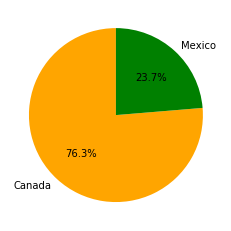

In [461]:
# to see how many ports for Canada and Mexico
canada = len(new_df[new_df.Border=="US-Canada Border"]["Port Code"].unique())
mexico = len(new_df[new_df.Border=="US-Mexico Border"]["Port Code"].unique())

slices = [canada, mexico]
country = ['Canada', 'Mexico']
colors = ['orange', 'g']
plt.pie(slices, labels=country, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

### Total number of people crossed border in 2018

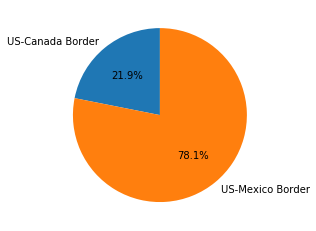

In [462]:
# pie chart to compare number of people crossing two different borders
d = people_df[['Border','Value']].groupby("Border").sum()
values = d.values.flatten()
labels = d.index
plt.pie(values, labels=labels,  startangle=90, autopct='%.1f%%')
plt.show()

In [463]:
# set date as index for measure in terms of people
people = people_df[['Date','Border','Value']].set_index('Date')
people = people.groupby([people.index.month, 'Border']).sum()

### How many people are crossing border in each month in 2018?

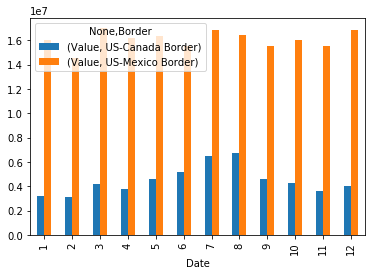

In [464]:
# compare number of people that cross US border
people.unstack(level=-1).plot(kind='bar')
plt.show()

### Is there different trend for these two borders?

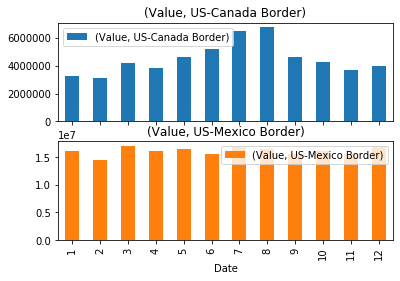

In [465]:
# seperate two borders to see trend for each country
people.unstack(level=-1).plot(kind='bar',subplots=True)
plt.show()

### What transportation do people use to cross US border?

In [466]:
# subset of mexico and canada data
mexico_df = people_df[people_df["Border"]=='US-Mexico Border']
canada_df = people_df[people_df["Border"]=='US-Canada Border']
# choose the column that i need
mexico = mexico_df[['Date','Measure','Value']].set_index('Date')
canada = canada_df[['Date','Measure','Value']].set_index('Date')

mexico = mexico.groupby([mexico.index.month,'Measure']).sum()
canada = canada.groupby([canada.index.month,'Measure']).sum()

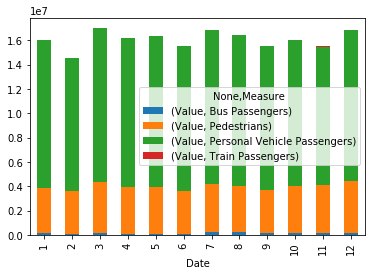

In [467]:
# mexico barchart
mexico.unstack(level=-1).plot(kind='bar',stacked=True)
plt.show()

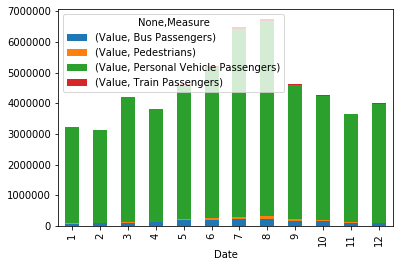

In [468]:
# canada barchart
canada.unstack(level=-1).plot(kind='bar',stacked=True)
plt.show()

### Which port is the more popular port ?

In [469]:
mexico_df.State.unique()

array(['Texas', 'Arizona', 'California', 'New Mexico'], dtype=object)

In [470]:
print(len(mexico_df["Port Name"].unique()))
print(len(mexico_df["Port Code"].unique()))

27
27


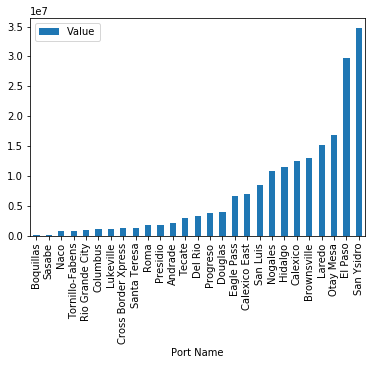

In [471]:
# graph by different ports
mexico_ports = mexico_df[['Port Name','State','Measure','Value','Date']]
mexico_ports.groupby('Port Name').sum().sort_values("Value").plot(kind='bar')
plt.show()

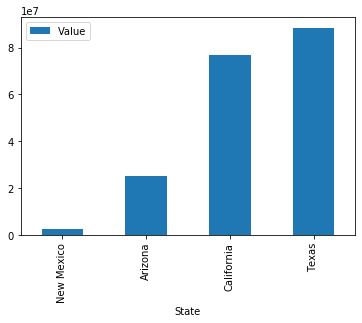

In [472]:
# graph by different states
mexico_ports.groupby('State').sum().sort_values("Value").plot(kind='bar')
plt.show()

### Ports in California

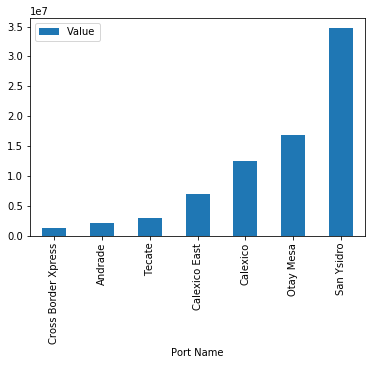

In [473]:
mexico_ports_ca = mexico_ports[mexico_ports.State=="California"]
mexico_ports_ca.groupby('Port Name').sum().sort_values("Value").plot(kind='bar')
plt.show()

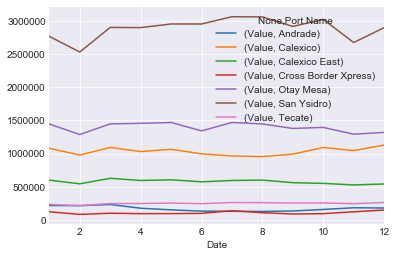

In [516]:
trend_ca = mexico_ports_ca.set_index("Date")
trend_ca = trend_ca.groupby(['Port Name', trend_ca.index.month]).sum()
trend_ca = trend_ca.unstack(level=0)
trend_ca.plot()

In [528]:
def trend(trend_,state):
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')
 
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    
    # multiple line plot
    num=0
    for column in trend_:
        if num == 9:
            break;
        num+=1
        # Find the right spot on the plot
        plt.subplot(3,3, num)

        # Plot the lineplot
        plt.plot(trend_.index, trend_[column]/trend_[column].sum(), marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)



        # Not ticks everywhere
        if num in range(7) :
            plt.tick_params(labelbottom=False)
        if num not in [1,4,7]:
            plt.tick_params(labelleft=False)

        # Add title
        plt.title(column[1], loc='left', fontsize=12, fontweight=0, color=palette(num) )

    plt.suptitle("Total trend for each port in {} by month".format(state), fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

    plt.show()

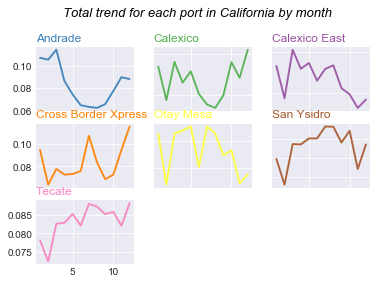

In [529]:
trend(trend_ca,"California")

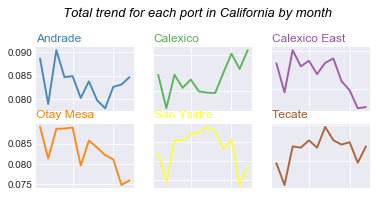

In [543]:
trend_ca = mexico_ports_ca[mexico_ports_ca.Measure=='Personal Vehicle Passengers']
trend_ca = trend_ca.set_index("Date")
trend_ca = trend_ca.groupby(['Port Name', trend_ca.index.month]).sum()
trend_ca = trend_ca.unstack(level=0)
trend(trend_ca,"California")

### Ports in Texas

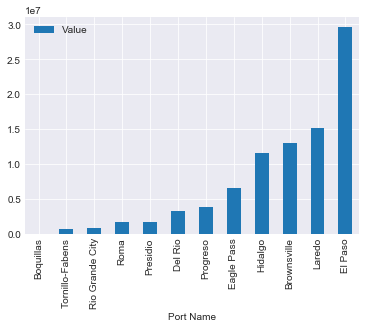

In [502]:
mexico_ports_tx = mexico_ports[mexico_ports.State=="Texas"]
mexico_ports_tx.groupby('Port Name').sum().sort_values("Value").plot(kind='bar')
plt.show()

In [ ]:
trend_tx = mexico_ports_tx.set_index("Date")
trend_tx = trend_tx.groupby(['Port Name', trend_tx.index.month]).sum()
trend_tx = trend_tx.unstack(level=0)
trend_tx.plot()

### Total trend for Texas

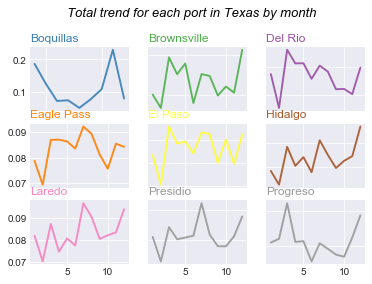

In [530]:
trend(trend_tx,"Texas")

### Pedestrian trend for Texas

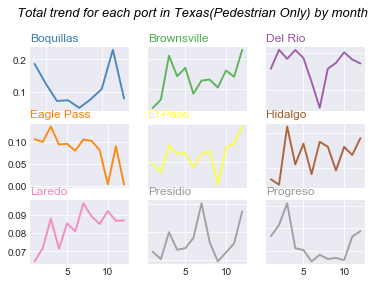

In [534]:
trend_tx = mexico_ports_tx[mexico_ports_tx.Measure=='Pedestrians']
trend_tx = trend_tx.set_index("Date")
trend_tx = trend_tx.groupby(['Port Name', trend_tx.index.month]).sum()
trend_tx = trend_tx.unstack(level=0)
trend(trend_tx, 'Texas(Pedestrian Only)')

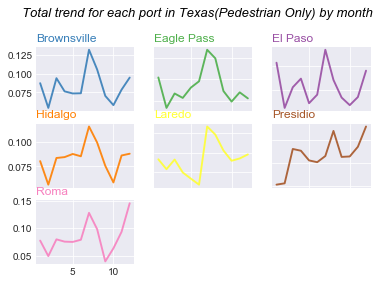

In [538]:
trend_tx = mexico_ports_tx[mexico_ports_tx.Measure=='Bus Passengers']
trend_tx = trend_tx.set_index("Date")
trend_tx = trend_tx.groupby(['Port Name', trend_tx.index.month]).sum()
trend_tx = trend_tx.unstack(level=0)
trend(trend_tx, 'Texas(Pedestrian Only)')